In [56]:
import pandas as pd
from sklearn.preprocessing import Normalizer
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import numpy as np

In [57]:
features = ['duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised','root_shell','su_attempted',
'num_root','num_file_creations','num_shells','num_access_files',
'is_guest_login',
'count',
'srv_count',
'serror_rate',
'srv_serror_rate',
'rerror_rate',
'srv_rerror_rate',
'same_srv_rate',
'diff_srv_rate',
'srv_diff_host_rate',
'dst_host_count',
'dst_host_srv_count',
'dst_host_same_srv_rate',
'dst_host_diff_srv_rate',
'dst_host_same_src_port_rate',
'dst_host_srv_diff_host_rate',
'dst_host_serror_rate',
'dst_host_srv_serror_rate',
'dst_host_rerror_rate',
'dst_host_srv_rerror_rate',
'class_label']

data = pd.read_csv('signature.csv', names=features, header=0)
data.head(10)



,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class_label
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.00,0.00,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.00,0.00,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.00,0.00,0.83,0.71,anomaly
5,0,tcp,http,SF,267,14515,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.01,0.00,0.00,0.00,normal
6,0,tcp,smtp,SF,1022,387,0,0,0,0,...,28,0.11,0.72,0.00,0.00,0.00,0.00,0.72,0.04,normal
7,0,tcp,telnet,SF,129,174,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.01,0.01,0.02,0.02,anomaly
8,0,tcp,http,SF,327,467,0,0,0,0,...,255,1.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,normal
9,0,tcp,ftp,SF,26,157,0,0,0,0,...,26,0.50,0.08,0.02,0.00,0.00,0.00,0.00,0.00,anomaly


In [58]:
print('The no of data points are:',data.shape[0])
print('The no of features are:',data.shape[1])
print('Some of the features are:',features[:10])

The no of data points are: 22544
The no of features are: 40
Some of the features are: ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot']


In [59]:
output = data['class_label'].values
labels = set(output)
print('The different type of output labels are:',labels)

The different type of output labels are: {'anomaly', 'normal'}


## Data Cleaning

In [60]:
data.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
urgent                          0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
is_guest_login                  0
count                          18
srv_count                      13
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

In [61]:
data=data.dropna()
print('Null values in the dataset are: ',len(data[data.isnull().any(1)]))
data.drop_duplicates(subset=features, keep='first', inplace=True)
data.shape


Null values in the dataset are:  0


(22520, 40)

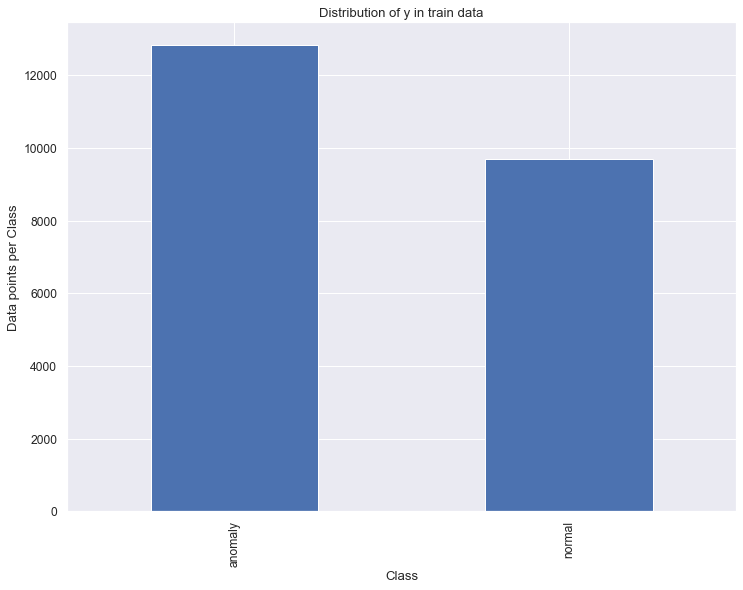

In [63]:
plt.figure(figsize=(12,9))
class_distribution = data['class_label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of y in train data')
#plt.grid()
plt.show()

## Feature Extraction

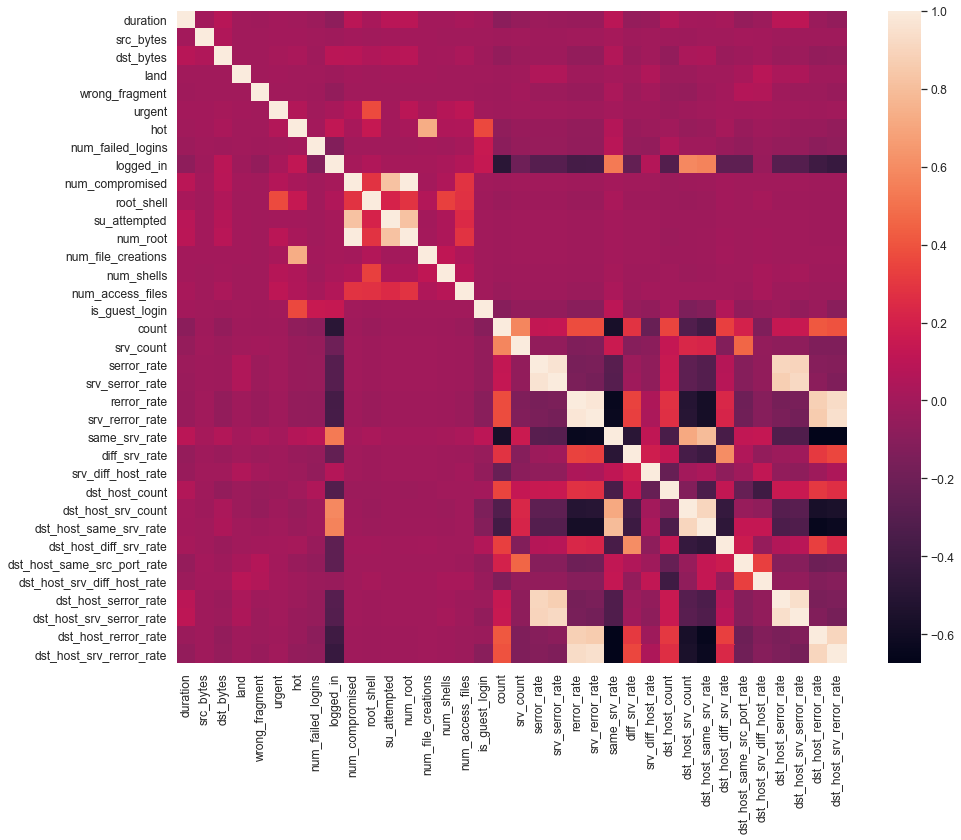

In [64]:
corr = data.corr()
  
plt.figure(figsize =(15, 12))
  
sns.heatmap(corr)
  
plt.show()

In [65]:
# This variable is highly correlated with num_compromised and can be ignored for analysis.
#(Correlation = 0.9938)
data.drop('num_root', axis = 1, inplace = True)

# This variable is highly correlated with serror_rate and can be ignored for analysis.
#(Correlation = 0.9983)
data.drop('srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and can be ignored for analysis.
#(Correlation = 0.9947)
data.drop('srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_serror_rate and can be ignored for analysis.
#(Correlation = 0.9993)
data.drop('dst_host_srv_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and can be ignored for analysis.
#(Correlation = 0.9869)
data.drop('dst_host_serror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and can be ignored for analysis.
#(Correlation = 0.9821)
data.drop('dst_host_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with rerror_rate and can be ignored for analysis.
#(Correlation = 0.9851)
data.drop('dst_host_srv_rerror_rate', axis = 1, inplace = True)

# This variable is highly correlated with srv_rerror_rate and can be ignored for analysis.
#(Correlation = 0.9865)
data.drop('dst_host_same_srv_rate', axis = 1, inplace = True)

# Remove irrelevant feature
data.drop('service', axis = 1, inplace = True)



## Transformation of categorical values

In [66]:
data['protocol_type'] = data['protocol_type'].astype('category')
data['flag'] = data['flag'].astype('category')
cat_columns = data.select_dtypes(['category']).columns

data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

Y = data['class_label']
X = data.drop('class_label', axis=1)

## Standardization

In [67]:
from sklearn.preprocessing import StandardScaler

sScaler = StandardScaler()
#rescaleX = sScaler.fit_transform(X)
X = sScaler.fit_transform(X)
names_inputed =features[0:30]
data = pd.DataFrame(data=X, columns=names_inputed)
print(data.shape)

(22520, 30)


## Normalization

In [68]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
X = norm.fit_transform(X)

## Splitting the DataSet

In [69]:
# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(15088, 30) (15088,)
(7432, 30) (7432,)


## Reusable Methods

In [70]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

def plot_confusion_matrix(y_test, y_pred):

    C = confusion_matrix(y_test, y_pred)
    cm_df = pd.DataFrame(C)
    labels = ['normal','anomaly']
    sns.set(font_scale=1.1)
    plt.figure(figsize=(8,6))
    ax = sns.heatmap(cm_df, annot=True, 
            fmt='g', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.ylabel('Actual Class')
    plt.xlabel('Predicted Class')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    plt.show()
    
def print_classification_report(y_test,y_pred):
    # classification report for precision, recall f1-score and accuracy
    CS = classification_report(y_test,y_pred,labels=['normal','anomaly'])
    print('Classification report : \n',CS)

# Code: Support Vector Classifier Model

In [71]:
from sklearn.svm import SVC
import time
  
svcModel = SVC(gamma = 'scale')
start_time = time.time()
svcModel.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_pred = svcModel.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

scoreSVM= accuracy_score(y_test,y_pred)
print("Accuracy of SVM Model is: ", scoreSVM)

Training time:  5.276011943817139
Testing time:  1.2549848556518555
Accuracy of SVM Model is:  0.9553283100107642


Classification report : 
               precision    recall  f1-score   support

      normal       0.91      0.91      0.91      3199
     anomaly       0.94      0.93      0.93      4233

    accuracy                           0.92      7432
   macro avg       0.92      0.92      0.92      7432
weighted avg       0.92      0.92      0.92      7432



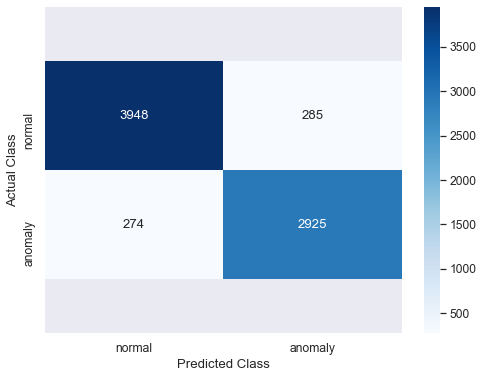

In [19]:
print_classification_report(y_test,y_pred)
plot_confusion_matrix(y_test, y_pred)


# Code: Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
  
dts = DecisionTreeClassifier(criterion ="entropy", max_depth = 4)
start_time = time.time()
dts.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_pred = dts.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

scoreDT= accuracy_score(y_test,y_pred)
print("Accuracy of DT Model is: ", scoreDT)

Training time:  0.5679936408996582
Testing time:  0.0020034313201904297
Accuracy of DT Model is:  0.9247847147470398


Classification report : 
               precision    recall  f1-score   support

      normal       0.91      0.91      0.91      3199
     anomaly       0.94      0.93      0.93      4233

    accuracy                           0.92      7432
   macro avg       0.92      0.92      0.92      7432
weighted avg       0.92      0.92      0.92      7432



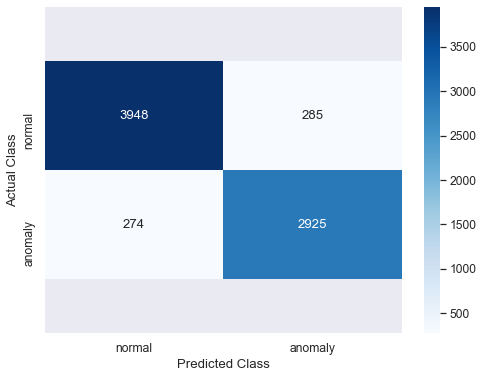

In [184]:
print_classification_report(y_test,y_pred)
plot_confusion_matrix(y_test, y_pred)

# Code: K-nearest-neighbor Classifier

In [73]:
from sklearn.neighbors import KNeighborsClassifier

# creating model for 5 neighbors
knn=KNeighborsClassifier(n_neighbors=5) 

start_time = time.time()
knn.fit(X_train, y_train.values.ravel())
end_time = time.time()
print("Training time: ", end_time-start_time)

start_time = time.time()
y_pred = knn.predict(X_test)
end_time = time.time()
print("Testing time: ", end_time-start_time)

scoreKNN= accuracy_score(y_test,y_pred)
print("Accuracy of KNN Model is: ", scoreKNN)

Training time:  0.2995455265045166
Testing time:  1.640505313873291
Accuracy of KNN Model is:  0.9639397201291712


Classification report : 
               precision    recall  f1-score   support

      normal       0.97      0.95      0.96      3199
     anomaly       0.96      0.97      0.97      4233

    accuracy                           0.96      7432
   macro avg       0.96      0.96      0.96      7432
weighted avg       0.96      0.96      0.96      7432



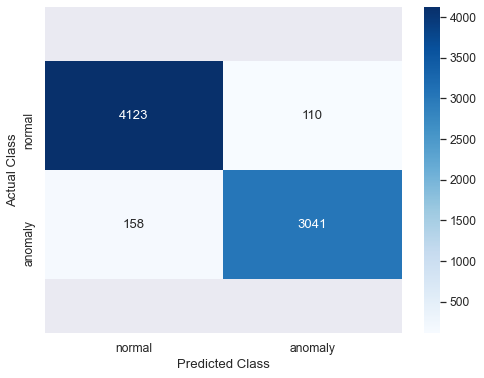

In [21]:
print_classification_report(y_test,y_pred)
plot_confusion_matrix(y_test, y_pred)

## Conclusion: Among the 3 classifier we have used the KNN accuracy is best among the 3 classifications used.

<BarContainer object of 3 artists>

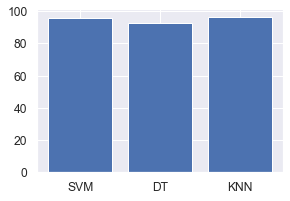

In [75]:
names = ['SVM', 'DT', 'KNN']
values = [95.5328, 92.4784, 96.3939]  
f = plt.figure(figsize =(15, 3), num = 10)
plt.subplot(131)
plt.bar(names, values)
